In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Article Replication

---
Discipline: 2021.1 Digital Image Processing, Federal University of Alagoas (UFAL)

Student: [Eduardo Antônio de Lucena Lisboa](https://github.com/EduardoLisboa/)

Discipline repository [here](https://github.com/EduardoLisboa/digital-image-processing-2021.1).

The original article can be found
[here](https://paperswithcode.com/paper/a-smartphone-application-to-detection-and) and the original repository
[here](https://github.com/FrexG/ycgcr_leaf_segmentation).

### Read the images paths

In [2]:
image_path = 'images'
full_image_paths = list()

if os.path.exists(image_path):
    # List all files in image_path folder
    filenames = [file for file in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, file))]

    # Filter only the image files inside the folder
    image_files = [img_file for img_file in filenames if img_file.split('.')[-1] in ['jpg', 'jpeg', 'png']]

    # Get the images full paths
    full_image_paths = [os.path.join(image_path, image) for image in image_files]
else:
    print('Incorrect Path')

print(full_image_paths)

['images\\1.jpg', 'images\\2.jpg', 'images\\3.jpg', 'images\\4.jpg', 'images\\5.jpg', 'images\\6.jpg']


### Load the images

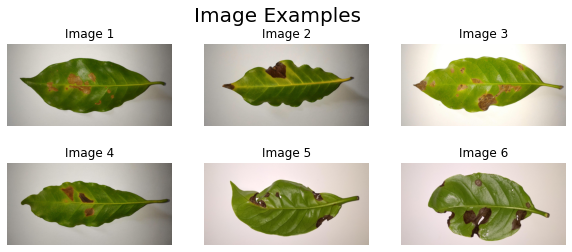

In [3]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Image Examples', fontsize=20)

bgr_images = list()
rgb_images = list()

for index, image in enumerate(full_image_paths):
    bgr_image = cv2.imread(image)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    bgr_images.append(bgr_image)
    rgb_images.append(rgb_image)

    fig.add_subplot(2, 3, index + 1)
    plt.title(f'Image {index + 1}')
    plt.axis('off')
    plt.imshow(rgb_image)

### Remove background

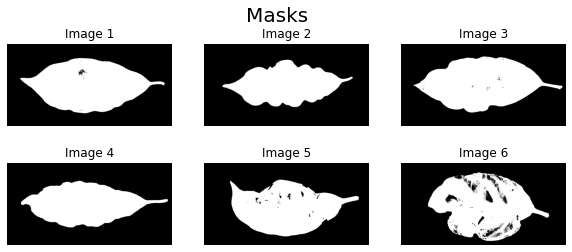

In [4]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Masks', fontsize=20)

bg_extracted_hsv_images = list()

for index, img in enumerate(bgr_images):
    blurred = cv2.GaussianBlur(img, (1, 1), 0)

    hsv_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    SV_channel = hsv_image.copy()

    SV_channel[:, :, 0] = np.zeros(SV_channel.shape[:2])
    SV_channel[:, :, 2] = np.zeros(SV_channel.shape[:2])

    low_hsv = (low_h, low_s, low_v) = (0, 0, 0)
    high_hsv = (high_h, high_s, high_v) = (0, 85, 0)

    mask = cv2.inRange(SV_channel, low_hsv, high_hsv)
    mask = cv2.bitwise_not(mask)

    bg_extracted = cv2.bitwise_and(hsv_image, hsv_image, mask=mask)

    bg_extracted_hsv_images.append(bg_extracted)

    fig.add_subplot(2, 3, index + 1)
    plt.title(f'Image {index + 1}')
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

### Segment diseased leaves

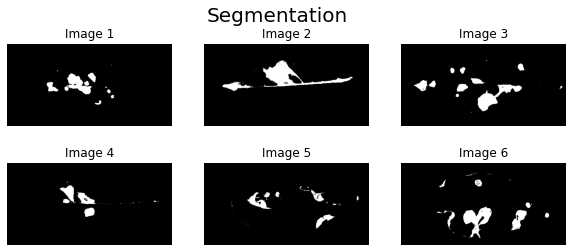

In [5]:
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Segmentation', fontsize=20)

segmented_images = list()

for index, img in enumerate(bg_extracted_hsv_images):
    # Convert to RGB then to YCbCr
    bg_extracted_rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    ycrcb_image = cv2.cvtColor(bg_extracted_rgb, cv2.COLOR_RGB2YCrCb)

    # Extract just the Cr component and reshape it to fit the K-Means
    cr_component = ycrcb_image[:, :, 1]
    z = cr_component.reshape((cr_component.shape[0] * cr_component.shape[1]))
    z = np.float32(z)

    # Perform clustering
    num_clusters = 2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    _, label, center = cv2.kmeans(z, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to original image
    center = np.uint8(center)
    converted_image = center[label.flatten()]
    converted_image = converted_image.reshape((cr_component.shape))

    segmented_images.append(converted_image)

    fig.add_subplot(2, 3, index + 1)
    plt.title(f'Image {index + 1}')
    plt.axis('off')
    plt.imshow(converted_image, cmap='gray')

### Comparing the original images with the segmented images

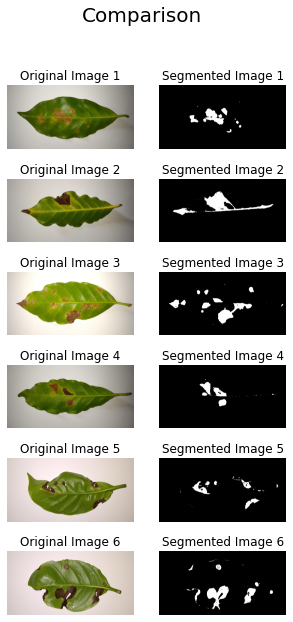

In [6]:
fig = plt.figure(figsize=(5, 10))
fig.suptitle('Comparison', fontsize=20)

for index, img in enumerate(segmented_images):
    fig.add_subplot(6, 2, (index * 2) + 1)
    plt.title(f'Original Image {index + 1}')
    plt.axis('off')
    plt.imshow(rgb_images[index])
    fig.add_subplot(6, 2, (index * 2) + 2)
    plt.title(f'Segmented Image {index + 1}')
    plt.axis('off')
    plt.imshow(segmented_images[index], cmap='gray')

